# Heart failure prediction

In [63]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/49/03/04ce11264d78f7a9f1025a13f8a078aa18eb2a9c628bc0a9a9c18673062c/ydata_profiling-4.7.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/e5/f3/8296f550276194a58c5500d55b19a27ae0a5a3a51ffef66710c58544b32d/pydantic-2.6.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     -------------------------------------- - 81.9/85.1 kB 4.5 MB/s eta 0:00:01
     ---------------------------------------- 85.1/85.1 kB 1.2 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://files.pythonhosted.org/packages/d9/59/e0233

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.6.4 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [65]:
from ydata_profiling import ProfileReport

In [66]:
import warnings
warnings.filterwarnings('ignore')

# Data analysis : Data Cleaning

In [67]:
df = pd.read_csv(r'C:\Users\home\Downloads\heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: xlabel='age', ylabel='DEATH_EVENT'>

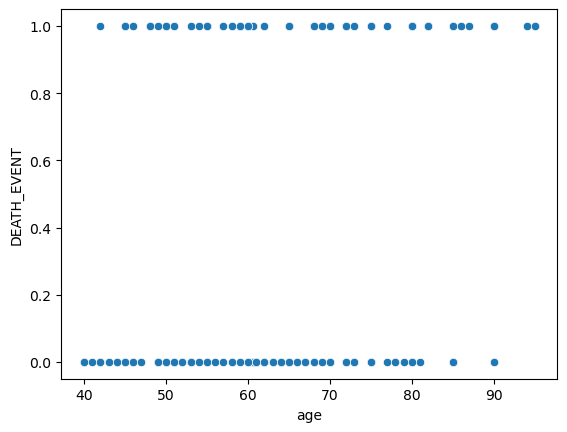

In [68]:
import seaborn as sns
sns.scatterplot(data =df,x='age',y = 'DEATH_EVENT')

<Axes: >

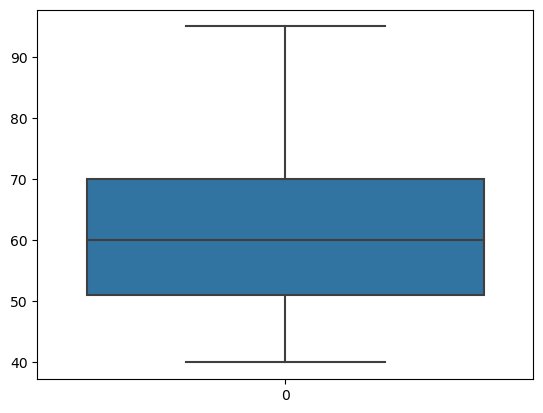

In [69]:
sns.boxplot(df['age'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [71]:
#Check the sample values using df.head()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [72]:
#Check the sample values using df.tail()
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [73]:
#Get the distribution of Numerical values
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [74]:
# Check null values 

df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Exploratory Data Analysis
Lets look at the features available to us.

1. Univariate Analysis of Categorical variables
anaemia
high_blood_pressure
diabetes
sex
smoking
DEATH_EVENT
The analysis for DEATH_EVENT column is done at the end of the notebook

<Axes: ylabel='count'>

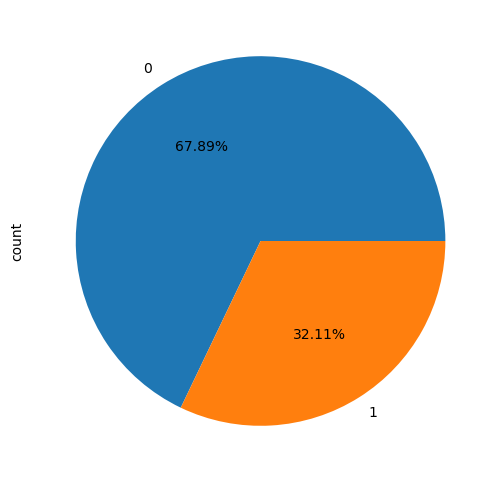

In [76]:
fig = plt.figure(figsize=(6, 6))
df['smoking'].value_counts().plot.pie(autopct='%1.2f%%')

In [77]:
age = df.iloc[:, 0]
creat = df.iloc[:, 2]
eject = df.iloc[:, 4]
plat = df.iloc[:, 6]
serum = df.iloc[:, 7]
sod = df.iloc[:, 8]
time = df.iloc[:, 11]

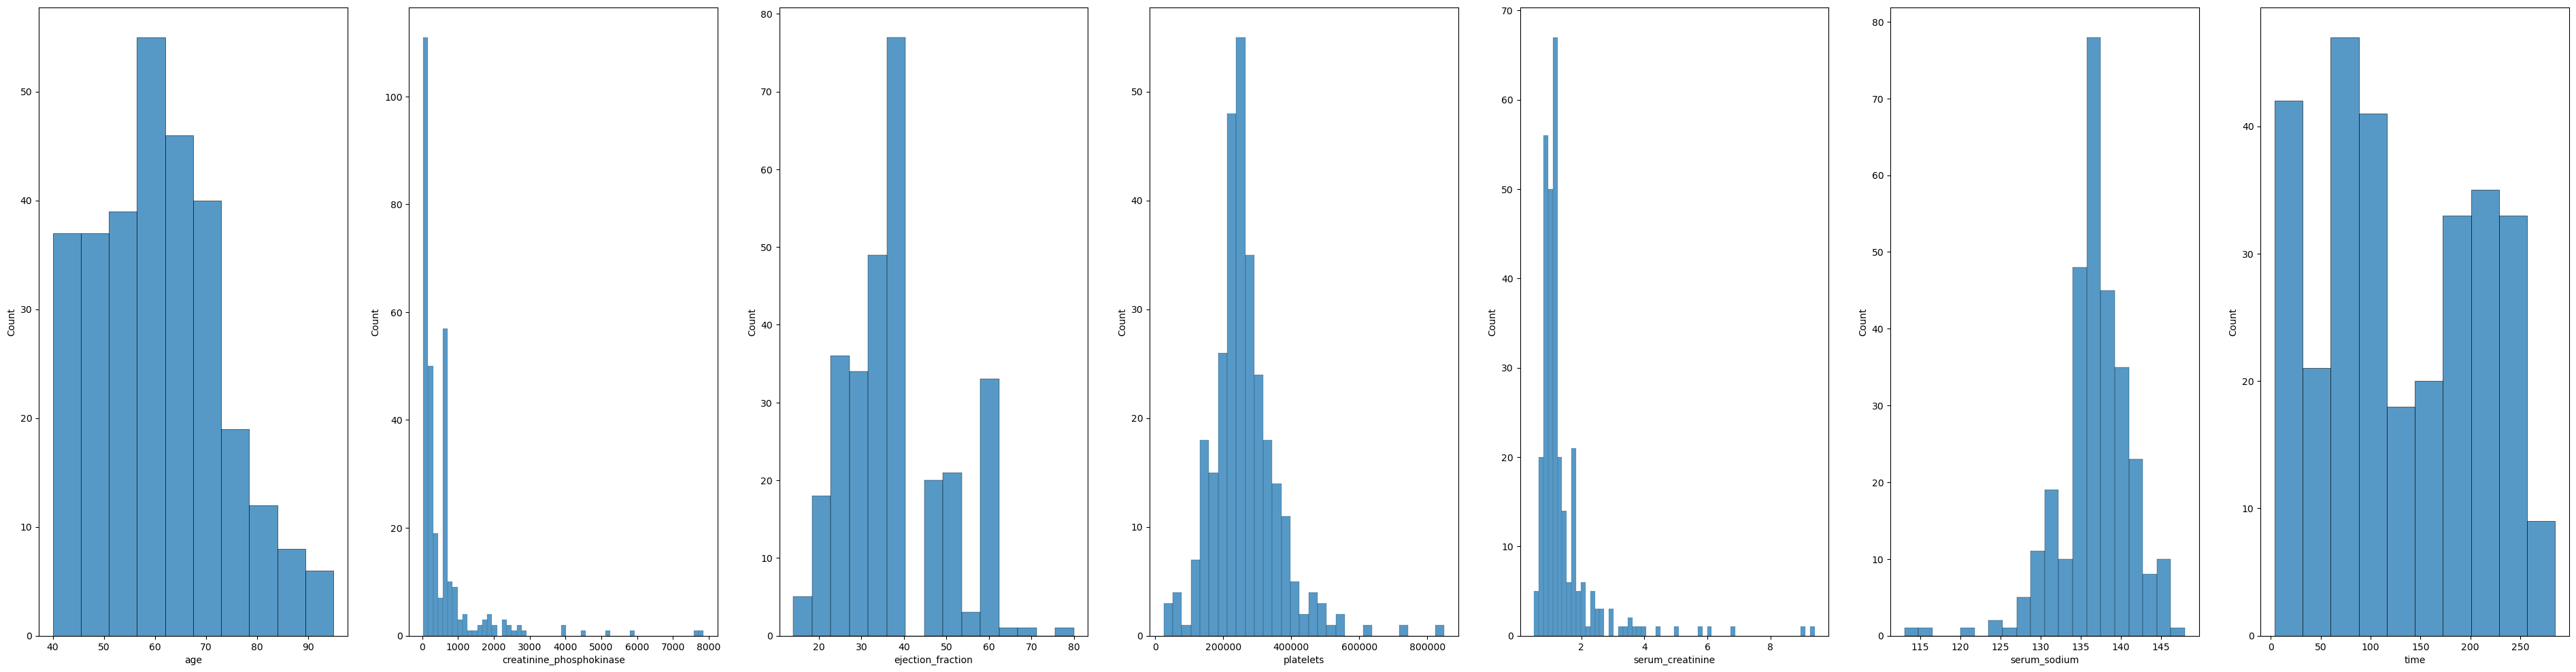

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=7)
sns.histplot(age,ax=axs[0])
sns.histplot(creat,ax=axs[1])
sns.histplot(eject,ax=axs[2])
sns.histplot(plat,ax=axs[3])
sns.histplot(serum,ax=axs[4])
sns.histplot(sod,ax=axs[5])
sns.histplot(time,ax=axs[6])
fig.set_figheight(12)
fig.set_figwidth(48)

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

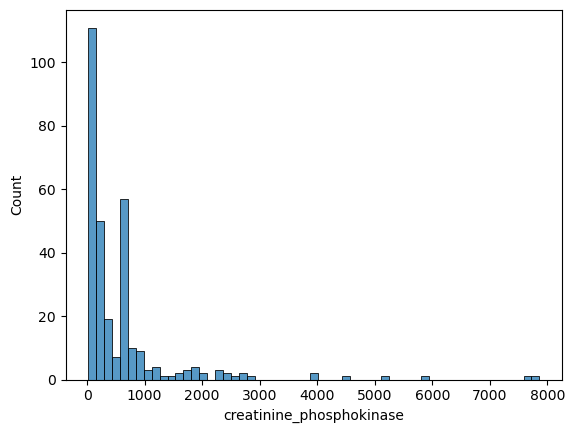

In [79]:
sns.histplot(creat)

# Train Test Split

In [80]:
pip install scikit-learn

In [81]:
from sklearn.model_selection import train_test_split

x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2, random_state=42
)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Classification Algorithms

# 
Random Forest Classifier
Logistic Regression
KNN
Decision Tree
SVM
Naive Bayes

# Random Forest Classifier

In [83]:
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6)
ranfor = dfrst.fit(x_train, y_train)
y_pred = ranfor.predict(x_test)

In [84]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred)))

print('precision:{:.2f}'.format(precision_score(y_test, y_pred)))

print('recall:{:.2f}'.format(recall_score(y_test, y_pred)))

print('f1_score:{:.2f}'.format(f1_score(y_test, y_pred)))

accuracy:0.68
precision:0.65
recall:0.52
f1_score:0.58


In [85]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred2 = logisticRegr.predict(x_test)

In [88]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred2)))

print('precision:{:.2f}'.format(precision_score(y_test, y_pred2)))

print('recall:{:.2f}'.format(recall_score(y_test, y_pred2)))

print('f1_score:{:.2f}'.format(f1_score(y_test, y_pred2)))

accuracy:0.80
precision:0.88
recall:0.60
f1_score:0.71


In [89]:
lr_accuracy = accuracy_score(y_test, y_pred2)
lr_precision = precision_score(y_test, y_pred2)
lr_recall = recall_score(y_test, y_pred2)
lr_f1 = f1_score(y_test, y_pred2)

# 

# KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [91]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Assuming x_train, x_test, y_train, and y_test are already defined

for n in range(1, Ks):
    # Train Model
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    
    # Predict
    yhat = neigh.predict(x_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc


array([0.53333333, 0.56666667, 0.53333333, 0.55      , 0.53333333,
       0.53333333, 0.53333333, 0.55      , 0.55      ])

In [92]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5666666666666667 with k= 2


In [93]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred3 = classifier.predict(x_test)

In [94]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred3)))

print('precision:{:.2f}'.format(precision_score(y_test, y_pred3)))

print('recall:{:.2f}'.format(recall_score(y_test, y_pred3)))

print('f1_score:{:.2f}'.format(f1_score(y_test, y_pred3)))

accuracy:0.57
precision:0.40
recall:0.08
f1_score:0.13


In [95]:
knn_accuracy = accuracy_score(y_test, y_pred3)
knn_precision = precision_score(y_test, y_pred3)
knn_recall = recall_score(y_test, y_pred3)
knn_f1 = f1_score(y_test, y_pred3)

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
mean_acc = np.zeros((9))
for d in range (1,10):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = d).fit(x_train,y_train)
    drugTree_yhat = drugTree.predict(x_test)
    print("For depth = {}accuracy score is {} ".format(d, accuracy_score(y_test, drugTree_yhat)))
    mean_acc[d-1] = accuracy_score(y_test, drugTree_yhat)

For depth = 1accuracy score is 0.75 
For depth = 2accuracy score is 0.75 
For depth = 3accuracy score is 0.7333333333333333 
For depth = 4accuracy score is 0.75 
For depth = 5accuracy score is 0.7166666666666667 
For depth = 6accuracy score is 0.6833333333333333 
For depth = 7accuracy score is 0.6666666666666666 
For depth = 8accuracy score is 0.6833333333333333 
For depth = 9accuracy score is 0.7 


In [98]:
print( "The best accuracy was with", mean_acc.max(), "with depth=", mean_acc.argmax()+1)

The best accuracy was with 0.75 with depth= 1


In [99]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1).fit(x_train,y_train)

In [100]:
drugTree_yhat = drugTree.predict(x_test)

In [101]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, drugTree_yhat)))

print('precision:{:.2f}'.format(precision_score(y_test, drugTree_yhat)))

print('recall:{:.2f}'.format(recall_score(y_test, drugTree_yhat)))

print('f1_score:{:.2f}'.format(f1_score(y_test, drugTree_yhat)))

accuracy:0.75
precision:0.81
recall:0.52
f1_score:0.63


In [102]:
dt_accuracy = accuracy_score(y_test, drugTree_yhat)
dt_precision = precision_score(y_test, drugTree_yhat)
dt_recall = recall_score(y_test, drugTree_yhat)
dt_f1 = f1_score(y_test, drugTree_yhat)

# SVM

In [103]:
from sklearn import svm
from sklearn.metrics import f1_score

In [104]:
from sklearn import svm
from sklearn.metrics import f1_score

for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svm_model = svm.SVC(kernel=k).fit(x_train, y_train)
    svm_yhat = svm_model.predict(x_test)
    f1 = f1_score(y_test, svm_yhat, average='weighted')
    print("For kernel: {}, the F1 score is: {}".format(k, f1))


For kernel: linear, the F1 score is: 0.7368014819388701
For kernel: poly, the F1 score is: 0.4298245614035087
For kernel: rbf, the F1 score is: 0.4298245614035087
For kernel: sigmoid, the F1 score is: 0.4298245614035087


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
clf = svm.SVC(kernel='linear')

In [107]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [108]:
yhat = clf.predict(x_test)

In [109]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, yhat)))

print('precision:{:.2f}'.format(precision_score(y_test, yhat)))

print('recall:{:.2f}'.format(recall_score(y_test, yhat)))

print('f1_score:{:.2f}'.format(f1_score(y_test, yhat)))

accuracy:0.75
precision:0.81
recall:0.52
f1_score:0.63


In [110]:
svm_accuracy = accuracy_score(y_test, yhat)
svm_precision = precision_score(y_test, yhat)
svm_recall = recall_score(y_test, yhat)
svm_f1 = f1_score(y_test, yhat)

# Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
gnb = GaussianNB()

In [113]:
gnb.fit(x_train, y_train)

GaussianNB()

In [114]:
y_pred4 = gnb.predict(x_test)

In [115]:
print('accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred4)))

print('precision:{:.2f}'.format(precision_score(y_test, y_pred4)))

print('recall:{:.2f}'.format(recall_score(y_test, y_pred4)))

print('f1_score:{:.2f}'.format(f1_score(y_test, y_pred4)))

accuracy:0.73
precision:0.91
recall:0.40
f1_score:0.56


In [116]:
nb_accuracy = accuracy_score(y_test, y_pred4)
nb_precision = precision_score(y_test, y_pred4)
nb_recall = recall_score(y_test, y_pred4)
nb_f1 = f1_score(y_test, y_pred4)

# Prediction Dictionary

In [117]:
import pandas as pd

accuracy_list = [rf_accuracy, lr_accuracy, knn_accuracy, dt_accuracy, svm_accuracy, nb_accuracy]
precision_list = [rf_precision, lr_precision, knn_precision, dt_precision, svm_precision, nb_precision]
recall_list = [rf_recall, lr_recall, knn_recall, dt_recall, svm_recall, nb_recall]
f1_list = [rf_f1, lr_f1, knn_f1, dt_f1, svm_f1, nb_f1]
columns = ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'Support Vector', 'Naive Bayes']
index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

evaluation_df = pd.DataFrame([accuracy_list, precision_list, recall_list, f1_list], index=index, columns=columns)
evaluation_df = evaluation_df.transpose()
evaluation_df.columns.name = 'Algorithms'


# Most Accurate Model

In [118]:
evaluation_df.sort_values(by="Accuracy", ascending=False)


Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector,0.750000,0.812500,0.52,0.634146
Naive Bayes,0.733333,0.909091,0.40,0.555556
Random Forest,0.683333,0.650000,0.52,0.577778
KNN,0.566667,0.400000,0.08,0.133333


# Highest Precision Score Model

In [119]:
evaluation_df.sort_values(by="Precision", ascending=False)


Algorithms,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.733333,0.909091,0.40,0.555556
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector,0.750000,0.812500,0.52,0.634146
Random Forest,0.683333,0.650000,0.52,0.577778
KNN,0.566667,0.400000,0.08,0.133333


# Highest Recall Score Model

In [120]:
evaluation_df.sort_values(by="Recall", ascending=False)


Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Random Forest,0.683333,0.650000,0.52,0.577778
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector,0.750000,0.812500,0.52,0.634146
Naive Bayes,0.733333,0.909091,0.40,0.555556
KNN,0.566667,0.400000,0.08,0.133333


# Highest F1 Score Model

In [121]:
evaluation_df.sort_values(by="F1 Score", ascending=False)


Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector,0.750000,0.812500,0.52,0.634146
Random Forest,0.683333,0.650000,0.52,0.577778
Naive Bayes,0.733333,0.909091,0.40,0.555556
KNN,0.566667,0.400000,0.08,0.133333


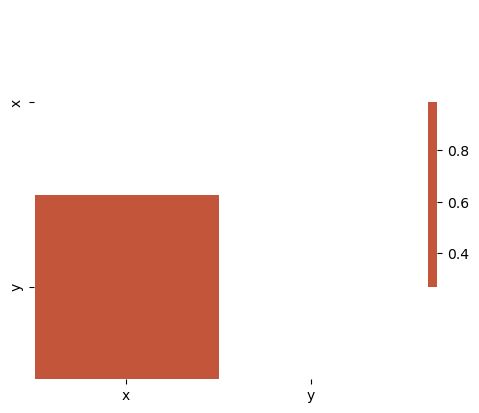

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming mask is already defined
# Example DataFrame to demonstrate
data = {'x': [0.75, 0.81, 0.52, 0.63],
        'y': [0.73, 0.91, 0.40, 0.56],}

df = pd.DataFrame(data)

# Calculate correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()


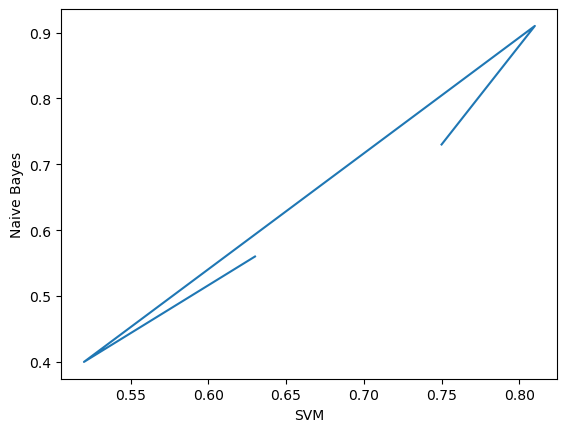

In [61]:
#Set up the matplotlib figure
import matplotlib.pyplot as plt

# Create a figure object with a single axes
fig, ax = plt.subplots()

# Add data to the plot
x = [0.75, 0.81, 0.52, 0.63]
y = [0.73, 0.91, 0.40, 0.56]
ax.plot(x, y)

# Add labels and title
ax.set_xlabel('SVM')
ax.set_ylabel('Naive Bayes')

# Display the plot
plt.show()


In [130]:
import csv

# Initialize an empty dictionary to store the data
data_dict = {}

# Read data from a CSV file
with open(r'C:\Users\home\Downloads\heart_failure_clinical_records_dataset.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Use the entire row as the key
        key = tuple(row.values())
        data_dict[key] = row

# Print the dictionary
for key, value in data_dict.items():
    print(key, value)


('75', '0', '582', '0', '20', '1', '265000', '1.9', '130', '1', '0', '4', '1') {'age': '75', 'anaemia': '0', 'creatinine_phosphokinase': '582', 'diabetes': '0', 'ejection_fraction': '20', 'high_blood_pressure': '1', 'platelets': '265000', 'serum_creatinine': '1.9', 'serum_sodium': '130', 'sex': '1', 'smoking': '0', 'time': '4', 'DEATH_EVENT': '1'}
('55', '0', '7861', '0', '38', '0', '263358.03', '1.1', '136', '1', '0', '6', '1') {'age': '55', 'anaemia': '0', 'creatinine_phosphokinase': '7861', 'diabetes': '0', 'ejection_fraction': '38', 'high_blood_pressure': '0', 'platelets': '263358.03', 'serum_creatinine': '1.1', 'serum_sodium': '136', 'sex': '1', 'smoking': '0', 'time': '6', 'DEATH_EVENT': '1'}
('65', '0', '146', '0', '20', '0', '162000', '1.3', '129', '1', '1', '7', '1') {'age': '65', 'anaemia': '0', 'creatinine_phosphokinase': '146', 'diabetes': '0', 'ejection_fraction': '20', 'high_blood_pressure': '0', 'platelets': '162000', 'serum_creatinine': '1.3', 'serum_sodium': '129', 'se

In [132]:
from ydata_profiling import ProfileReport
import pandas as pd

# Assuming you have data_dict containing your data

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(data_dict, orient='index')

# Generate profile report
pr_df = ProfileReport(df)

# Show the profile report
pr_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]